### Магазин "Стримчик". разработка принципов прогнозирования успешности продуктов.

### Описание проекта

Интернет-магазине «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Цель исследования**

Разработать принцип работы с данными, позволяющий выявить успешность продукта, чтобы в дальнейшем делать ставку на более успешный продукт и планировать соответствующие рекламные кампании.

#### Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
  
Данные за 2016 год могут быть неполными.  
    

### Изучение общей информации

#### Импортируем библиотеки

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st



#### Получаем общую информацию о данных

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


#### Построим гистограмму

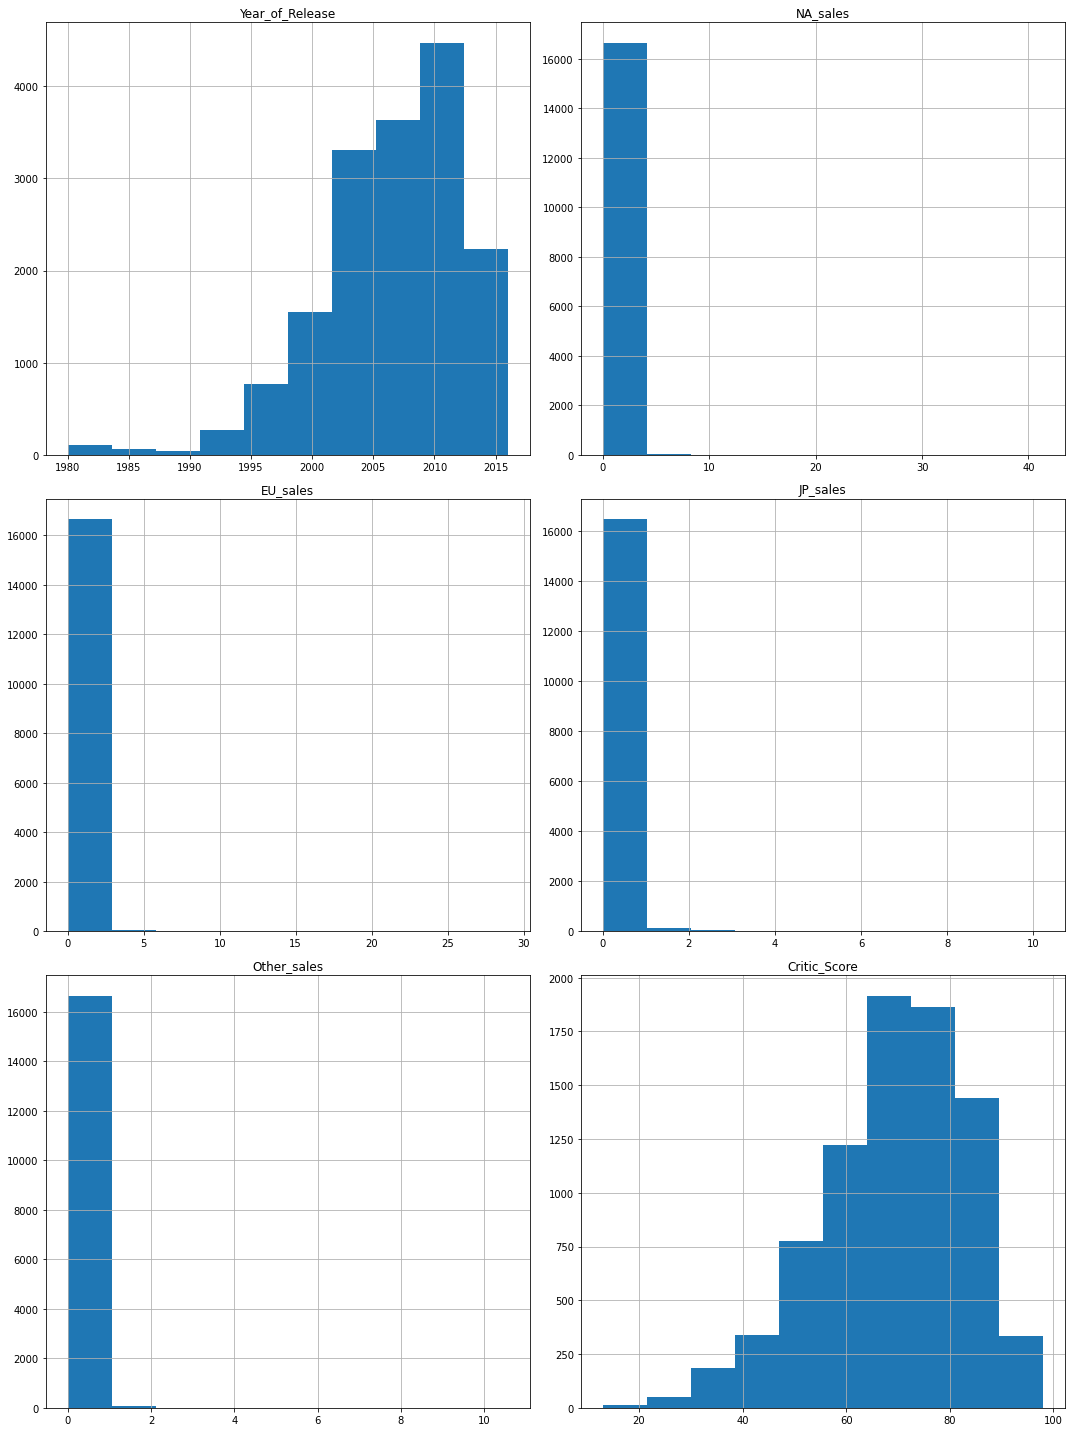

In [6]:
data.hist(figsize=(15, 20))
plt.tight_layout() # убираем служебную информацию

In [7]:
data.duplicated().sum()# проверка явных дубликатов

0

#### Пропуски значений

In [8]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

#### Процент пропусков

In [9]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 0%
Platform - 0%
Year_of_Release - 2%
Genre - 0%
NA_sales - 0%
EU_sales - 0%
JP_sales - 0%
Other_sales - 0%
Critic_Score - 51%
User_Score - 40%
Rating - 40%


**Вывод**

- Следует перевести названия столбцов к нижнему регистру
- Перевести Year_of_Release в Int User_Score в float, обработав поля содержащие tbd
- Заполнить пропуски, где это возможно
- Явных дубликатов не обнаружено.
- Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Подготовка данных

#### Переведем название столбцов к нижнему регистру

In [10]:
data.columns = data.columns.str.lower()

In [11]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Переведем year_of_release в тип Int64

In [12]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [14]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Обработка пропусков

##### О возможной причине пропусков

- Пропуски в таких колонках как name и genre скорее всего являются человеческой ошибкой. Вероятнее всего их просто не заполнили.
- Причиной пропусков в critic_score и user_score так же может быть нехватка информации. Отсутствие оценки или недостаточное колличество оценок соответствено.
- Определенные пропуски в year_of_release можно объяснить тем, что продукт еще не выпустили на рынок.
- Пропуски в rating, возможно объясняются еще и тем,что продукт еще не был передан на оценку по причине его не готовности. 

#### Обработка user_score

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

##### О значении 'tbd'

Логично предположить, что значение 'tbd' означает английскую фразу 'To be determined' и выставлялось в тех случаях, когда у продукта было не достаточно пользовательских оценок. С целью перевода в числовой фомат предлагаю заменить эти значения на -1.

In [16]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [17]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [18]:
data['user_score'] = data['user_score'].astype('float64')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


##### Замена пропусков в name  genre и rating на "Не указано"

In [20]:
columns_to_fill = ['name', 'genre', 'rating']
for column in columns_to_fill:
    data[column] = data[column].fillna('Не указано')

In [21]:
data.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

##### О оставшихся пропусках

Оставшиеся пропуски предлагаю не заполнять т.к. это либо параметр, который придется заполнять в ручную (rating), либо численные метрики, которые некорректно заполнять медианным или средним значением на мой взгляд (critic_score, user_score)  

##### Добавим столбец общих продаж

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [23]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Не указано,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Не указано,31.38


### Исследовательский анализ данных

#### Количество продуктов в разные годы

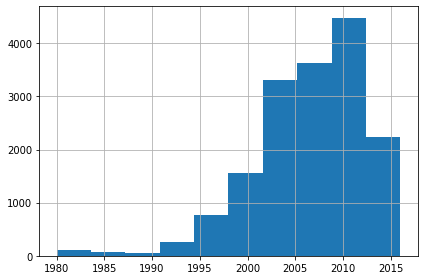

In [24]:
data['year_of_release'].hist()
plt.tight_layout() # убираем служебную информацию

In [25]:
games_by_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

In [26]:
games_by_year.columns = ['count']

In [27]:
games_by_year.sort_values(by='count', ascending=False)

,count
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


**Выводы**

Из полученых данных уже видно,что можно отсечь продукты выпущенные до, как-минимум 1995 года (Их сумарно не много и скорее всего они выпущены на принципиально устаревших платформах.) Для того, чтобы сделать дальнейшие выводы нужно исследовать платформы.

#### Исследование актуальности платформ

##### Выведем уникальные платформы в датасете

In [28]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

##### Выведем платформы с наибольшим количеством продаж

In [29]:
top_salers = data.groupby('platform')['total_sales'].sum()

In [30]:
top_salers.sort_values(ascending=False).head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

##### Сделаем срез по датафрейму только с данными по этим платформам

In [31]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC' ]

In [32]:
top_salers_data = data.query('platform == @top_platforms')

In [33]:
top_salers_data['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', 'PS', 'PC', 'PSP'],
      dtype=object)

##### Создадим pivot_table и график по ней

In [34]:
top_salers_by_year = top_salers_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

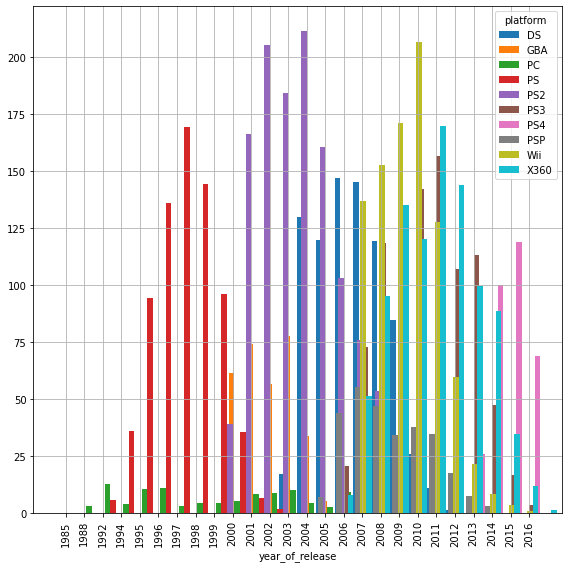

In [35]:
top_salers_by_year.plot(kind='bar', figsize=(8, 8), grid=True, width=3)
plt.tight_layout()

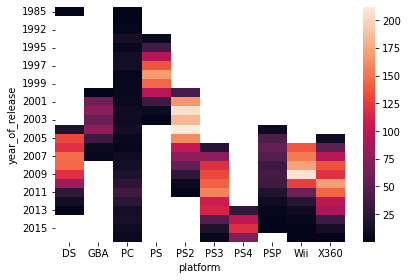

In [36]:
sns.heatmap(top_salers_by_year)
plt.tight_layout()

**Выводы**
- Средний жизненный цикл платформы 6-7 лет.
- Актуальной для анализа предлагаю считать период с 2013 года. Т.к. с этого периода активны актуальные платформы

#### Срежем данные до 2013 года

In [37]:
current_data = data.query('year_of_release >= 2013')

In [38]:
current_data['year_of_release'].unique()

<IntegerArray>
[2013, 2015, 2014, 2016]
Length: 4, dtype: Int64

#### Выберем потенциально перспективные, актуальные платформы

In [39]:
current_top_salers = current_data.groupby('platform')['total_sales'].sum()

In [40]:
current_top_salers.sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

**Выводы**
- Предлагаю считать эти платформы перспективными на данный момент.

##### Построим "ящик с усами" по платформам на котором видно "выбросы"

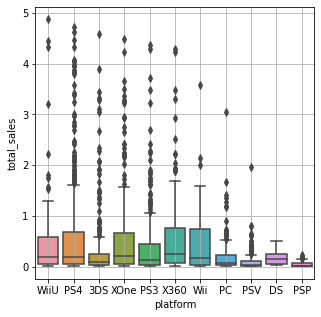

In [41]:
fig = plt.figure(figsize=(5, 5))
sns.boxplot(x='platform', y='total_sales', 
            data=current_data[current_data['total_sales'] < 5])
plt.grid()
plt.show()

##### Построим еще один для наглядности квартилей 

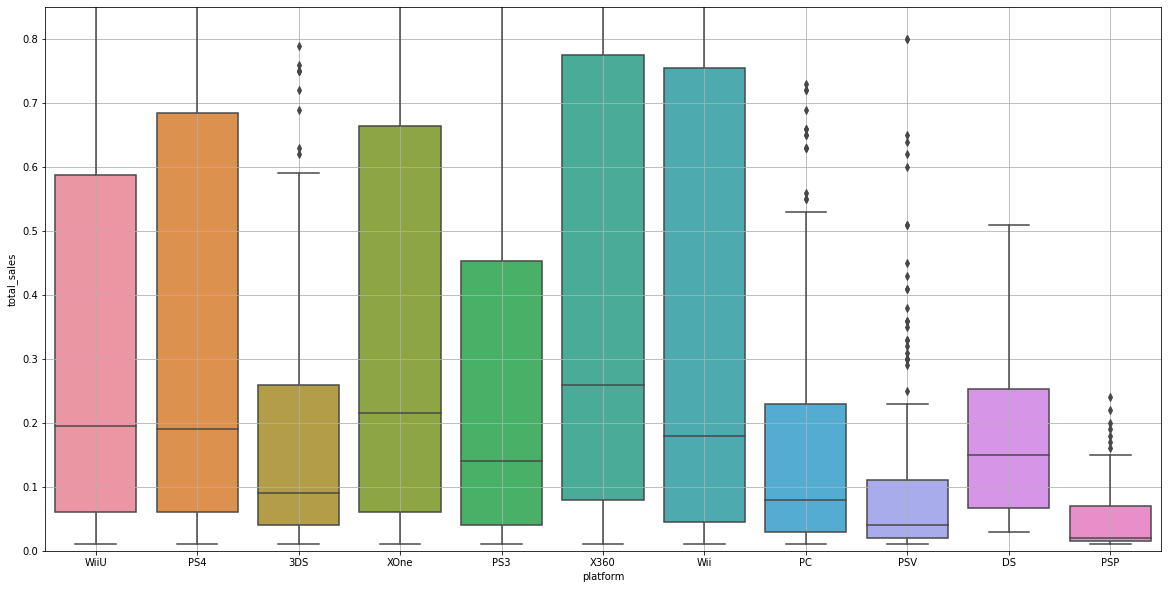

In [42]:
fig = plt.figure(figsize=(20, 10))
sns.boxplot(x='platform', y='total_sales',
            data=current_data[current_data['total_sales'] < 5])
plt.ylim(0, 0.85)
plt.grid()
plt.show()

**Выводы**
- Наибольшее количество прибыльных продуктов выпускаяется на больших платформах (Платформах семейства xbox, playstation)
- Из портативных платформ выйгрышно показывает себя 3ds, возможно еще и по причине своей полной совместимости с предыдущим поколением.
- Относительный успех крупных продуктов WiiU в 2022 году сложно воспринимать без иронии, но в 2016 эта платформа выглядела значительно более перспективно (особенно учитывая работу на все 3 больших рынка.)

#### Влияние рейтингов на продажи

#### Срежем данные по ps4

In [43]:
ps4_data = current_data.query("platform == 'PS4'")

##### Влияние рейтингов на продажи внутри платформы

In [44]:
ps4_ratings_rel = ps4_data.pivot_table(index='name', values=['critic_score', 'user_score', 'total_sales'])

In [45]:
ps4_ratings_rel.corr()

,critic_score,total_sales,user_score
critic_score,1.000000,0.406568,0.557654
total_sales,0.406568,1.000000,-0.031957
user_score,0.557654,-0.031957,1.000000


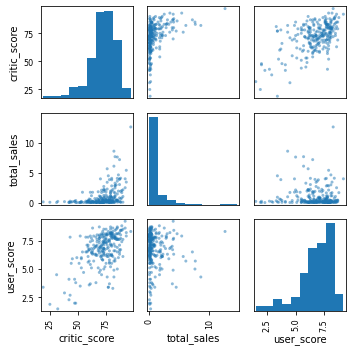

In [46]:
pd.plotting.scatter_matrix(ps4_ratings_rel, figsize=(5, 5))
plt.tight_layout()

**Выводы**
- На PS4 оценки критиков показывают прямую слабую зависимость с продажами
- Оценки пользователей показывают обратную слабую связь с продажами

#### Получим данные по XBOX ONE

In [47]:
xone_data = current_data.query("platform == 'XOne'")

In [48]:
xone_ratings_rel = xone_data.pivot_table(index='name',
                                         values=['critic_score', 'user_score', 'total_sales'])

In [49]:
xone_ratings_rel.corr()

,critic_score,total_sales,user_score
critic_score,1.000000,0.416998,0.472462
total_sales,0.416998,1.000000,-0.068925
user_score,0.472462,-0.068925,1.000000


#### Получим данные по 3ds

In [50]:
ds_data = current_data.query("platform == '3DS'")

In [51]:
ds_ratings_rel = ds_data.pivot_table(index='name',
                                         values=['critic_score', 'user_score', 'total_sales'])

In [52]:
ds_ratings_rel.corr()

,critic_score,total_sales,user_score
critic_score,1.000000,0.357057,0.769536
total_sales,0.357057,1.000000,0.241504
user_score,0.769536,0.241504,1.000000


**Выводы**
- Похожее соотношение наблюдается на других проверенных платформах.

#### Иследование по жанрам

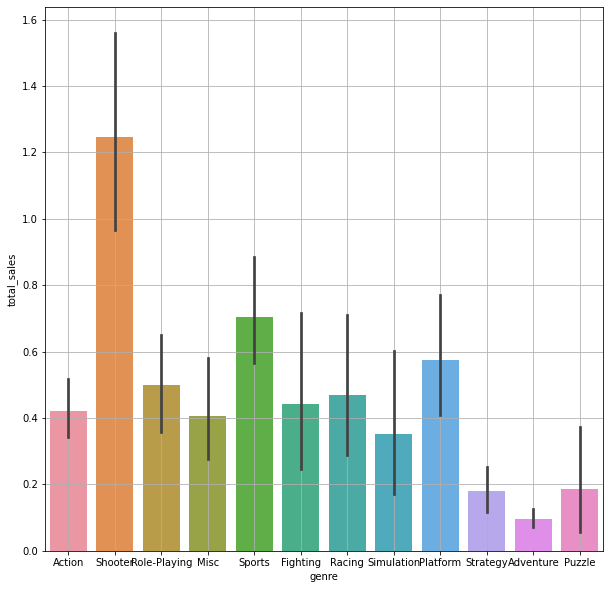

In [53]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x='genre', y='total_sales', 
            data=current_data)
plt.grid()
plt.show()

**Выводы**

- Наиболее популярными жанрами этого  являются шутеры и спортивные игры. Причем шутеры сильно лидируют относительно всех других жанров
- Наименьшей популярностью полбзуются игры в жанре puzzle, adventure и strategy, возможно это связанно еще и с относительно невысоким колличеством новых игр в этих жанрах.

#### Портрет пользователя каждого региона

##### Популярность платформ для каждого региона

In [54]:
na_top_platforms = current_data.groupby('platform')['na_sales'].sum()
na_top_platforms.sort_values(ascending=False).head()

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

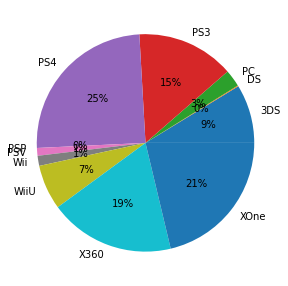

In [55]:
fig = plt.figure(figsize=(5, 5))
plt.pie(na_top_platforms, labels=na_top_platforms.index, autopct='%.0f%%')
plt.show()

In [56]:
jp_top_platforms = current_data.groupby('platform')['jp_sales'].sum()
jp_top_platforms.sort_values(ascending=False).head()

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

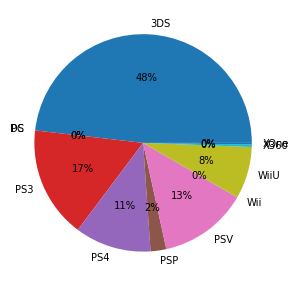

In [57]:
fig = plt.figure(figsize=(5, 5))
plt.pie(jp_top_platforms, labels=jp_top_platforms.index, autopct='%.0f%%')
plt.show()

In [58]:
eu_top_platforms = current_data.groupby('platform')['eu_sales'].sum()
eu_top_platforms.sort_values(ascending=False).head()

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

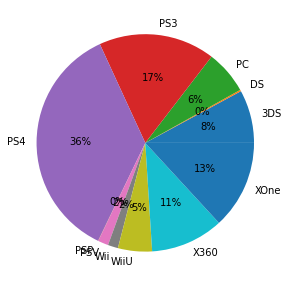

In [59]:
fig = plt.figure(figsize=(5, 5))
plt.pie(eu_top_platforms, labels=eu_top_platforms.index, autopct='%.0f%%')
plt.show()

**Вывод**
- В NA и EU рынках приобладают консоли больших производителей, а за ними следуют популярные портативные консоли
- Однако в EU рынке оба поколения платформ крупных производителей следуют друг за другом, что может сведетельствовать о более медленном темпе перехода пользователей на платформы последнего поколения PC так же держит более высокие позиции сравнительно с NA
- В JP рынке преобладют портативные консоли, что связано с тем, что большАя часть досуга подобного рода происходит во время поездки на учебу или работу. Еще одной причиной является относительно небольшая площадь жилых помещений. Отсутствие интереса в продуктах Microsoft то же явдяется историческим фактором.

##### Популярность жанров  для каждого региона

In [60]:
na_top_genres = current_data.groupby('genre')['na_sales'].sum()
na_top_genres.sort_values(ascending=False).head()

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [61]:
jp_top_genres = current_data.groupby('genre')['jp_sales'].sum()
jp_top_genres.sort_values(ascending=False).head().head()

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

In [62]:
eu_top_genres = current_data.groupby('genre')['eu_sales'].sum()
eu_top_genres.sort_values(ascending=False).head()

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

При общей популярности жанров Action, Shooter и Role-Playing В EU выделяется более высокая популярность жанра Racing а в JP Fighting


##### Влияние ESRB на продажи в регионах

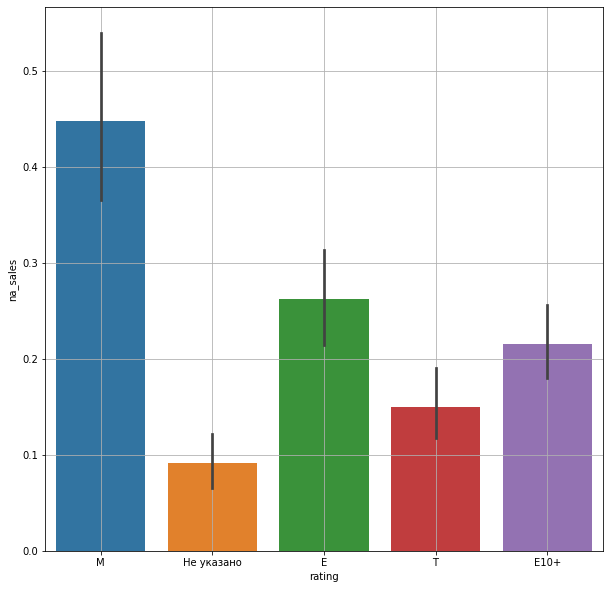

In [63]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x='rating', y='na_sales', 
            data=current_data)
plt.grid()
plt.show()

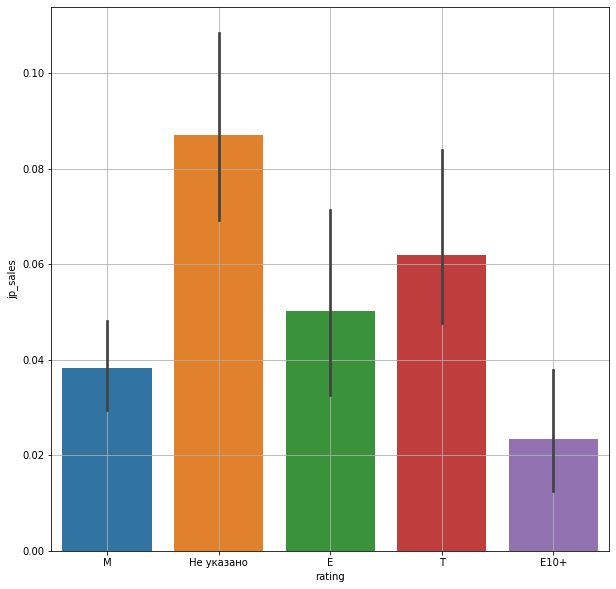

In [64]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x='rating', y='jp_sales', 
            data=current_data)
plt.grid()
plt.show()

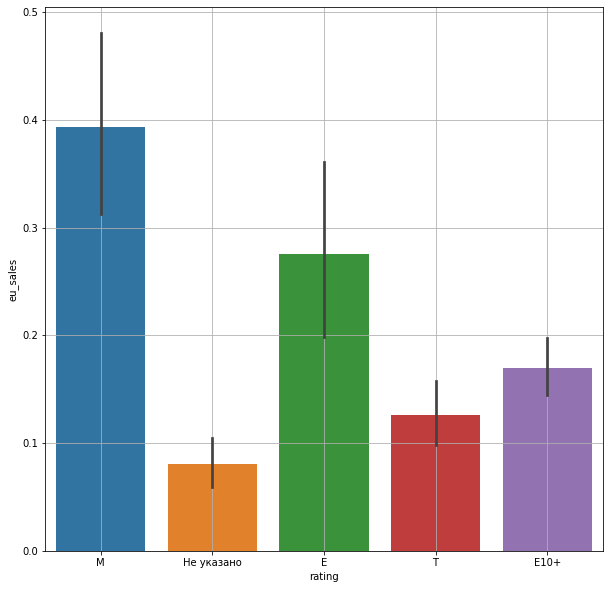

In [65]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x='rating', y='eu_sales', 
            data=current_data)
plt.grid()
plt.show()

**Выводы**
- В NA и EU рынках пользуются спросом продукты категории M. Чему способствует довольно большое колличество исторических и социологических факторов. Отражаемых часто даже в визуальном дизайне маркетингово материала для этих регионов.
- Среди продуктов оцененных ESRB JP рынке преобладают продукты категории T и Е, что во многом может быть связанно еще и с публичностью данного рода досуга в этом регионе. Крайне высокий показатель "Не оцененных" игр может объясняться наличием в японии своей организации по оценке контента игр - CERO.  

#### Проверка Гипотез

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые 

```
H_0: Пользовательские оценки (user_score) пользователей PC ≠ Пользовательские оценки (user_score) пользователей XBOX ONE`
H_a: Пользовательские оценки (user_score) пользователей PC = Пользовательские оценки (user_score) пользователей XBOX ONE`
alpha = 0.05
```

##### Подготовим выборки

In [66]:
sample1 = current_data[(current_data['platform'] == 'PC')]['user_score'] 

In [67]:
sample1 = sample1.dropna()

In [68]:
sample2 = current_data[(current_data['platform'] == 'XOne')]['user_score'] 

In [69]:
sample2 = sample2.dropna()


In [70]:
alpha =  0.05 

results = st.ttest_ind(
    sample1, 
    sample2)

print(results.pvalue)


if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


##### Средние пользовательские рейтинги жанров Action и Sports разные.

```
H_0: Пользовательские оценки (user_score) жанрa Action = Пользовательские оценки (user_score) жанрa Sport`
H_a: Пользовательские оценки (user_score) жанрa Action ≠ Пользовательские оценки (user_score) жанрa Sport`
alpha = 0.05
```

In [71]:
sample1 = current_data[(current_data['genre'] == 'Action')]['user_score']


In [72]:
sample1 = sample1.dropna()

In [73]:
sample2 = current_data[(current_data['genre'] == 'Sports')]['user_score']


In [74]:
sample2 = sample2.dropna()

In [75]:

alpha =  0.05 

results = st.ttest_ind(
    sample1, 
    sample2) 

print(results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.0517832389140023e-27
Отвергаем нулевую гипотезу


Обе гипотезы проверял методом st.ttest_ind

#### Общий вывод

**Рекомендации по платформам**

В ходе исследования рынка платформ были выявлены несколько лидирующих производителей. Это "большие" консоли от xbox и playstation и портативные консоли от Nintendo. При этом если на NA и EU рынках более популярны "большие" консоли то на JP рынках большей популярностью пользуются портативные варианты.

**Прогнозы по платформам**

Имеет смысл следить за новостями от крупных производителей представленных в иследовании (Playstation, Microsoft, Nintendo) ведь именно они стабильно являются лидерами в своих сегментах. 

**Рекомендации по жанрам**

Хотя  продукты в жанрах Action, Shooter, Role-playing популярны во всех рынках стоит отметить еще и тот факт, что в этих жанрах впринципе производится большое колличество продуктов.

Отдельно стоит отметить, что для многих покупателей жанр Sports будет являтся "основным". Существенное количество покупателей NA и EU рынков готовы будут переходить на более новые платформы, чтобы следить за предпочитаемыми ими спортивными франчайзами.

Стоит отдельно отметить популярность игр в жанре Racing на EU рынке и Fighting на рынке JP

**Прогнозы по жанрам**

Жанровые предпочтения пользователей наврятли существенно изменятся в ближайшее время.

**О соотношении оценок и продаж**

В ходе исследования не было выявленно слишеом сильного соотношения между оценками пользователей и критиков и продажами. А с ростом популярности стриминговых платформ эти соотношения могут уменьшиться еще сильнее.

**О влияние рейтингов ESRB на продажи**

На NA и EU рынках высокой популярностью пользуются продукты рейтинга M это стоит учитывать при подготовке маркетинговых кампаний.

JP рынок имеет свою собственную организацию по оценке контента игр поэтлму рейтинг ESRB может иметь там меньшее значение.

**О гипотезах**

Первую гипотезу пришлось опровергнуть. Вторую принять.